### Make sure you have access to a GPU

In [1]:
!nvidia-smi

Sun Nov 16 19:29:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   50C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Make sure you mount your google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/workspace/Neural-Model-Translation/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/workspace/Neural-Model-Translation


### Install Pakages

In [ ]:
!pip install -r gpu_requirements.txt > _
!pip install git+https://github.com/d2l-ai/d2l-zh@release > _ # installing d2l

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
huggingface-hub 0.36.0 requires tqdm>=4.42.1, but you have tqdm 4.29.1 which is incompatible.
prophet 1.1.7 requires tqdm>=4.36.1, but you have tqdm 4.29.1 which is incompatible.
datasets 4.0.0 requires tqdm>=4.66.3, but you have tqdm 4.29.1 which is incompatible.
spacy 3.8.7 requires tqdm<5.0.0,>=4.38.0, but you have tqdm 4.29.1 which is incompatible.
dataproc-spark-connect 0.8.3 requires tqdm>=4.67, but you have tqdm 4.29.1 which is incompatible.
dopamine-rl 4.1.2 requires tqdm>=4.64.1, but you have tqdm 4.29.1 which is incompatible.
  Running command git clone --filter=blob:none --quiet https://github.com/d2l-ai/d2l-zh /tmp/pip-req-build-eszqznya
  Running command git checkout -b release --track origin/release
  Switched to a new branch 'release'
  Branch 'release' set up to track remote branch 'release' from '

### Generate vocab using SentencePiece

In [ ]:
!sh run.sh vocab

sh: 0: cannot open run.sh: No such file


### Train the model

In [ ]:
!sh run.sh train

流式输出内容被截断，只能显示最后 5000 行内容。
****************************************
torch.Size([32, 65, 1024])
****************************************
torch.Size([32, 58, 1024])
****************************************
torch.Size([32, 62, 1024])
****************************************
torch.Size([32, 129, 1024])
****************************************
torch.Size([32, 77, 1024])
****************************************
torch.Size([32, 84, 1024])
****************************************
torch.Size([32, 67, 1024])
****************************************
torch.Size([32, 59, 1024])
****************************************
torch.Size([32, 70, 1024])
****************************************
epoch 8, iter 21820, avg. loss 61.13, avg. ppl 7.05 cum. examples 26240, speed 10189.75 words/sec, time elapsed 2107.12 sec
torch.Size([32, 86, 1024])
****************************************
torch.Size([32, 77, 1024])
****************************************
torch.Size([32, 83, 1024])
********************************

### Test the model

In [ ]:
!sh run.sh test model.bin

Output hidden; open in https://colab.research.google.com to view.

### Generate perplexity graphs

In [ ]:
from IPython import display
from matplotlib import pyplot as plt
from d2l import torch as d2l
display.set_matplotlib_formats('svg')

class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
    def display(self):
        print(1)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


/tmp/ipython-input-3115868646.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
!pip install d2l==1.0.0a0

  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.0 MB/s eta 0:00:00


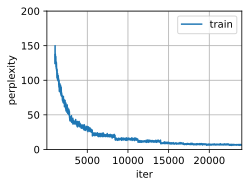

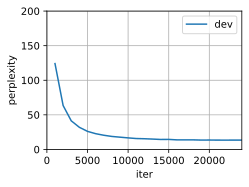

In [ ]:
%matplotlib inline
train_ppl = [tuple(map(float, each.split())) for each in open("ppl.log", "r")]
dev_ppl = [tuple(map(float, each.split())) for each in open("dev_ppl.log", "r")]
max_x = train_ppl[-1][0]
animator = Animator(xlabel='iter', ylabel='perplexity',
                        legend=['train'], xlim=[30, max_x], ylim=[0, 200])
# removing the points from the first crazy declining epoch
for iter, ppl in train_ppl:
    if iter > 1000:
        animator.add(iter, [ppl])
animator.display()
d2l.plt.savefig("train_ppl.svg", bbox_inches='tight', pad_inches=0)

animator = Animator(xlabel='iter', ylabel='perplexity',
                        legend=['dev'], xlim=[0, max_x], ylim=[0, 200])
for iter, ppl in dev_ppl:
    animator.add(iter, [ppl])
a = animator.display()
d2l.plt.savefig("dev_ppl.svg", bbox_inches='tight', pad_inches=0)

### Download files automatically

In [ ]:
from google.colab import files
files.download('model.bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('train_ppl.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("./outputs/test_outputs.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('dev_ppl.svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>